This Kernel is meant to solve the Housing Prices Challenge in a simple way and produce an acceptable leaderboard score. We will apply Linear Regression and machine learning models known for handling structured data.

> Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

Resources used to guide my personal learning and application throughout this House Price project:
* [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
* [Getting Started with Kaggle: House Prices Competition](https://www.dataquest.io/blog/kaggle-getting-started/)
* [Regularized Linear Models](https://www.kaggle.com/apapiu/regularized-linear-models)

**Notebook Content:**
1. Imports
2. Exploratory Data Analysis
3. Transforming and Engineering Feautures

In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualiation tools
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
plt.style.use('ggplot')

# sci-kit learn tools
from scipy.stats import skew

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os


In [136]:
# given data imports
train = pd.read_csv('C:/Users/iv486342.NET/Documents/Housing Dataset/train.csv')
test = pd.read_csv('C:/Users/iv486342.NET/Documents/Housing Dataset/test.csv')

# copies of DS for manipulation (we will use this for remainder of project)
train_df = train.copy()
test_df = test.copy()

# copies for EDA purposes
EDA_train = train.copy()
EDA_test = test.copy()

# combine data sets to avoid dimension misalignment
all_data = pd.concat((train_df.loc[:,'MSSubClass':'SaleCondition'],
                      test_df.loc[:,'MSSubClass':'SaleCondition']))

print(train_df.shape, test_df.shape, all_data.shape)

(1460, 81) (1459, 80) (2919, 79)


In [137]:
# drop target (dependent variable) from training dataframe
actual_y = train_df['SalePrice']
#train_df = train_df.drop('SalePrice', axis=1)

train_df.shape

(1460, 81)

**Exploratory Data Analysis**

In [135]:
# from Abhinand "Predicting HousingPrices: Simple Approach" Kernel
def show_all(df):
    #This fuction lets us view the full dataframe
    with pd.option_context('display.max_rows', 100, 'display.max_columns', 100):
        display(df)

In [72]:
show_all(train_df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


> We can see that there exists many qualitative and missing values^
> 
> Let's take a look at the skewness of SalePrice to see if a log transformation will be necessary for linear regression.

Skew is:  1.8828757597682129


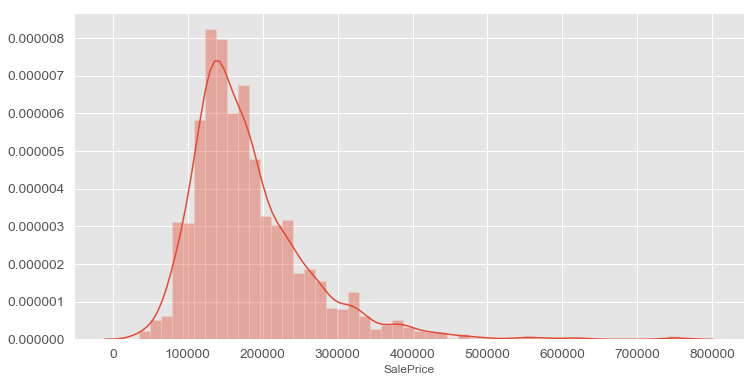

In [129]:
type(train_df)
#sp.stats.spearmanr(train_df)
f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(actual_y)
print("Skew is: ", actual_y.skew())

> You can see that the data is skewed. We will attempt to log-transform the data to bring the skew number closer to 0.

Skew is:  0.12133506220520406


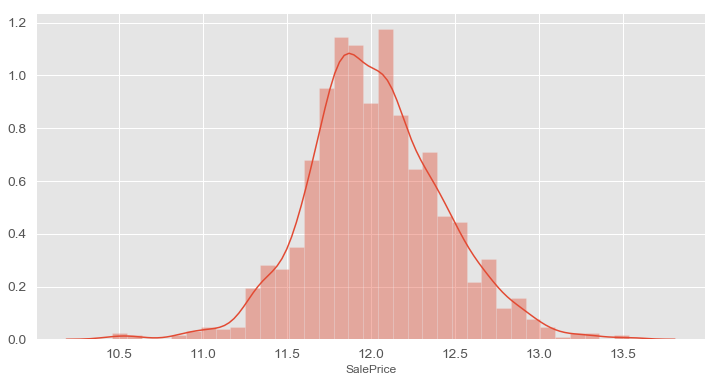

In [130]:
log_actual_y = np.log(actual_y)
f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(log_actual_y)

print("Skew is: ", log_actual_y.skew())

In [131]:
> A skew value closer to 0 means that we have improved the skewness of the data. You can see from the plot that the logged data resembles a normal distribution!

SyntaxError: invalid syntax (<ipython-input-131-91ac1e9a3d16>, line 1)

We will handle quantitative and qualitative features seperately. We will begin with Quantitative features. We will examine correlation between actual SalePrice and quantitative features.

In [132]:
quant = train.select_dtypes(include=[np.number])
quant.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

> Examine correlations between SalePrice and target

In [133]:
corr = quant.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5])
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


We can now see the top 5 most postiviely correlated features with SalePrice. 
> If your dataset has perfectly positive or negative attributes then there is a high chance that the performance of the model will be impacted by a problem called — “Multicollinearity”

Lets take a look at a correlation heatmap.

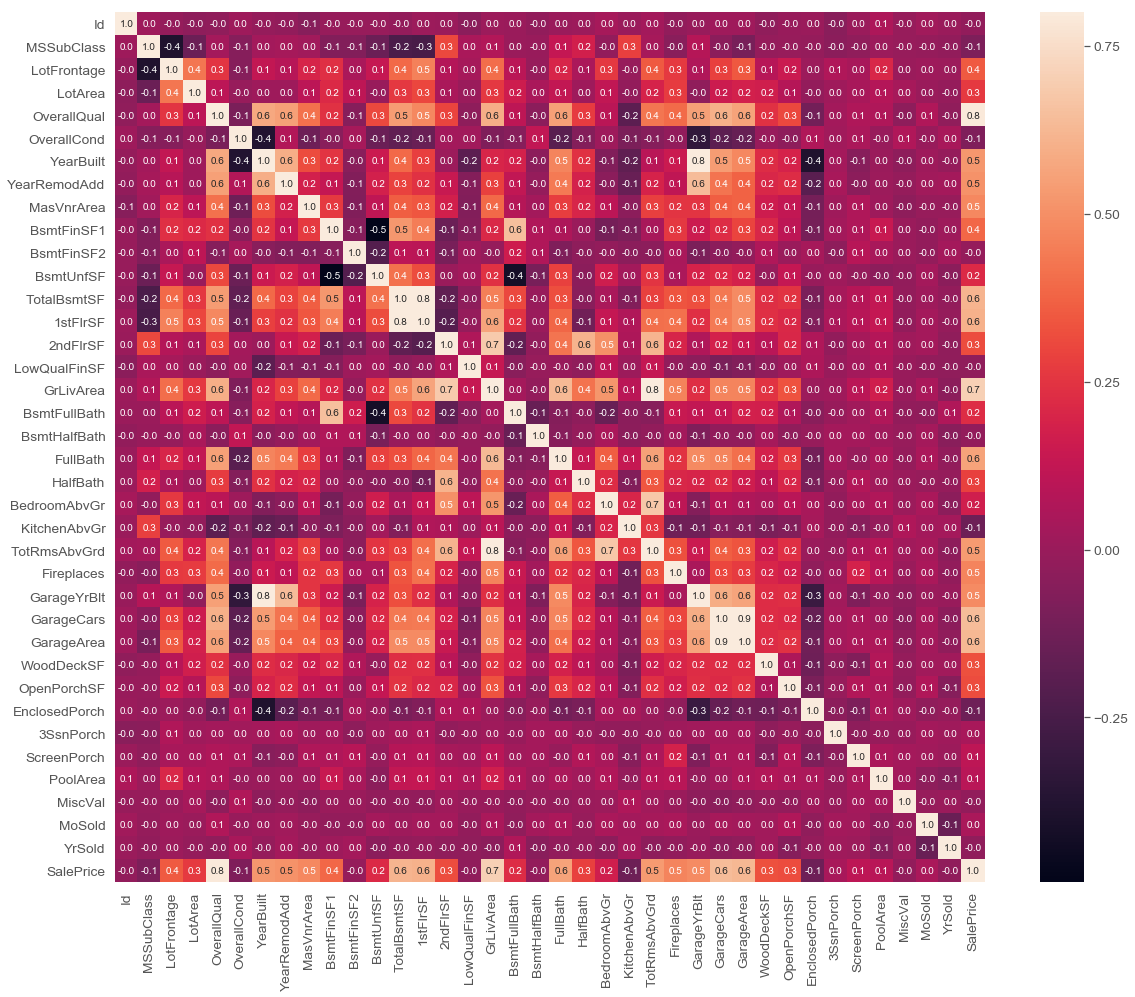

In [77]:
corr_map = train_df.corr()
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(corr_map, vmax=.8, square=True, annot=True, fmt='.1f')
plt.show();

> We can see that 'GrLivArea' and 'TotRmsAbvGrd', 'TotalBsmtSF' and '1stFlrSF', 'YearBuilt' and 'GarageYrBlt' have high correlations. **These correlations are so strong that it can indicate a situation of multicollinearity**.

Lets take a moment to visualize these highly correlated numeric features (and later trim outliers).


In [123]:
# Top 10 high correlation to SalePrice matrix
n = 10
cols = corr_map.nlargest(n, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(10,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

KeyError: "['SalePrice'] not in index"

* 'GarageCars' and 'GarageArea' are like twins. So we just need one. We will choose 'GarageCars' because it has a stronger correlation to 'SalePrice'!
* 'TotalBsmtSF' and '1stFlrSF' are also twins. We will choose 'TotalBsmtSF' because of higher correlation to SP
* 'TotRmsAbvGrd' and 'GrLivArea' are also twins. We will choose 'GrLivArea'

> * (Drop 'GarageArea')
> * (Drop '1stFlrSF')
> * (Drop 'TotRmsAbvGrd')

In [124]:
train_df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [125]:
# pivot table to further investigate relationship between 'OverallQual' and 'SalePrice'
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


AttributeError: 'DataFrame' object has no attribute 'SalePrice'

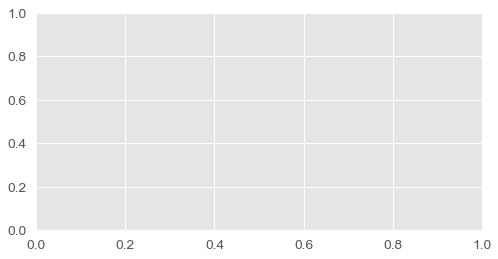

In [122]:
f, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x='OverallQual', y = train_df.SalePrice, color='green',data=train_df)

> We can see that as the overall quality of the house increases so does the price of the house. This is an excellent variable for our model.

Now we will take a look at 'GrLivArea'

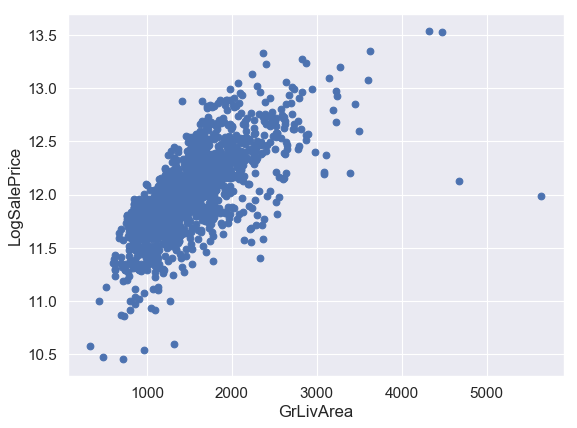

In [82]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x = train_df['GrLivArea'], y = log_actual_y)
plt.ylabel('LogSalePrice')
plt.xlabel('GrLivArea')
plt.show()

> Outliers can affect a regression model by pulling our estimated regression line further away from the true population regression line. So, we’ll remove those observations from our data.

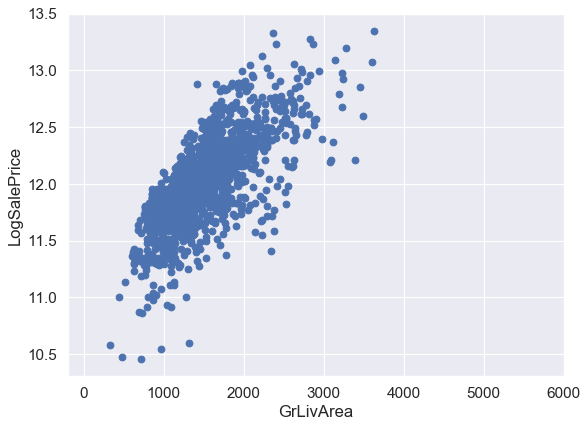

In [83]:
# remove outliers and update EDA_train
EDA_train = EDA_train[EDA_train['GrLivArea'] < 4000]

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x = EDA_train['GrLivArea'], y = np.log(EDA_train.SalePrice))
plt.xlim(-200,6000) # keeps same scale as first scatter plot
plt.ylabel('LogSalePrice')
plt.xlabel('GrLivArea')
plt.show()

In [84]:
# lets do the same for all data
#all_data = all_data[all_data['GrLivArea'] < 4000]

Now we will take a look at garage area.

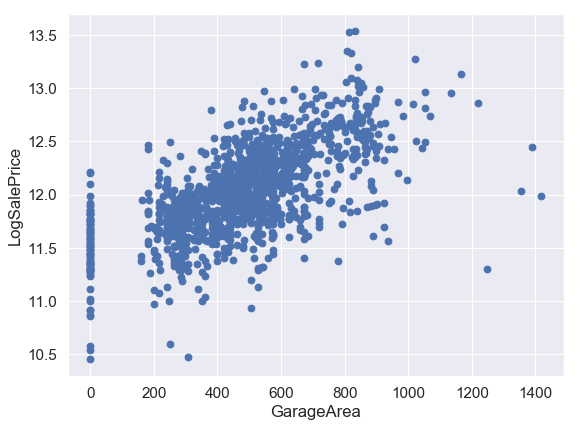

In [85]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x = train_df['GarageArea'], y = np.log(train_df.SalePrice))
plt.ylabel('LogSalePrice')
plt.xlabel('GarageArea')
plt.show()

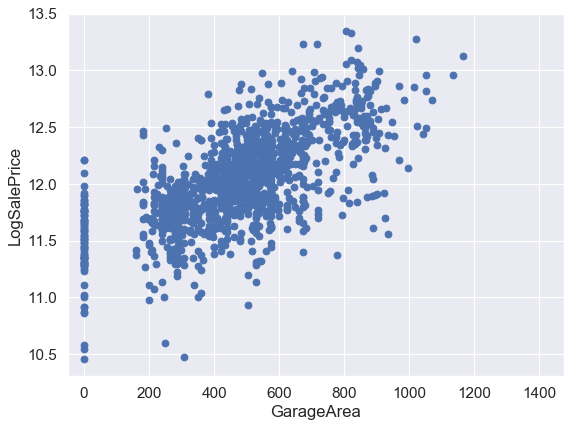

In [86]:
# remove outliers and update train_df
EDA_train = EDA_train[EDA_train['GarageArea'] < 1200]

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x = EDA_train['GarageArea'], y = np.log(EDA_train.SalePrice))
plt.xlim(-50,1475)
plt.ylabel('LogSalePrice')
plt.xlabel('GarageArea')
plt.show()

In [87]:
# instead of removing outlier rows, lets try to impute them with a value
# dropping rows with outliers is misaligning my data and preventing submission
#all_data = all_data[all_data['GarageArea'] < 1200]

We can do more investigation on other variable outliers at a later date. Now we will take a look at missing values and begin imputation process. (Do not forget it will soon be time to combine two data sets to avoid dimension misalignment)

In [88]:
# Number of missing values in each column of training data
missing_vals = (train_df.isnull().sum())
print(missing_vals[missing_vals > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


We will drop all variables with a high amount of missing values. Why? None of these variables seem to be important or considered when deciding to buy a house (and that's probably why they have so many missing values). 
> Drop: 'MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'

In regards to the Garage-related variables with missing values, we already have a garage variable with a high correlation to SalePrice. That variable alone will do the trick so we will delete all Garage variables with missing data.
> Drop: 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'

The same logic applies to Bsmt variables. Also MasVnr variables correlate heavily with 'OverallQual' so we will delete those.

We will delete everything except for Electrical.

> General intution here was gathered from [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)


*We will now begin an analysis on the normality of some of our very important features. Let's note our most important variables thus far:*
> * OverallQual
> * GarageCars (recall all other garage variables have been dropped)
> * TotalBsmtSF (recall all other Bsmt variables have been dropped)
> * GrLivArea

Skew is:  1.3665603560164552


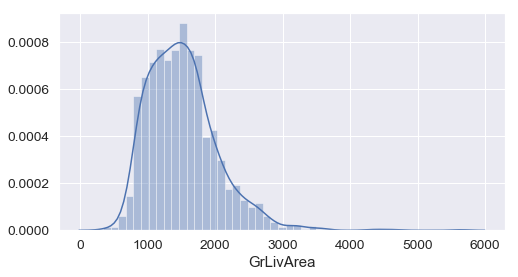

In [89]:
# GrLivArea
f, ax = plt.subplots(figsize=(8, 4))
sns.distplot(train_df['GrLivArea'])
print("Skew is: ", train_df['GrLivArea'].skew())

Holy skew! Let's transform.

Skew is:  -0.006995182187690808


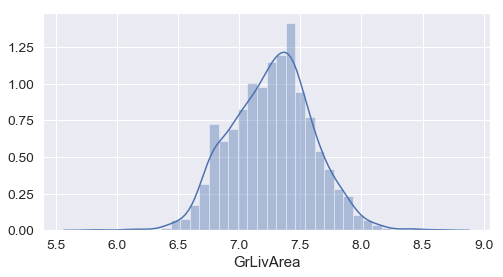

In [90]:
train_df['GrLivArea'] = np.log(train_df['GrLivArea'])

f, ax = plt.subplots(figsize=(8, 4))
sns.distplot(train_df['GrLivArea'])
print("Skew is: ", train_df['GrLivArea'].skew())

Skew is:  1.5242545490627664


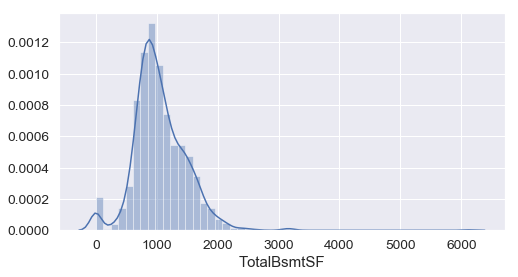

In [91]:
# TotalBsmtSF
f, ax = plt.subplots(figsize=(8, 4))
sns.distplot(train_df['TotalBsmtSF'])
print("Skew is: ", train_df['TotalBsmtSF'].skew())

> There does exists methods to log-transform complicated variables that contain: values equal to zero. We will visit this at a later date.

**Transforming and Engineering Features**
> Start with applying all drops and transformations noted in EDA section. 
> For this section I reference: [Regularized Linear Models](https://www.kaggle.com/apapiu/regularized-linear-models)

In [92]:
all_data.shape

(2919, 79)

In [93]:
# we will begin by applying log transformation to skewed numeric features
num_data = all_data.dtypes[all_data.dtypes != "object"].index

skew_data = all_data[num_data].apply(lambda x: skew(x.dropna()))
skew_data = skew_data[skew_data > 0.75]
skew_data = skew_data.index

all_data[skew_data] = np.log1p(all_data[skew_data])

C:\Users\iv486342.NET\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log1p
  


For the sake of working quick, we will encode all qualitative variables with dummy representations. At a later point we will re-visit qualitative variables with a more granular approach.

In [94]:
all_data.shape

(2919, 79)

In [95]:
# drop all features with missing values, noted above : keep electrical
all_data = all_data.drop((missing_vals[missing_vals > 1]).index,1)
#all_data = all_data.drop(all_data.loc[all_data['Electrical'].isnull()].index)

# fix few number of missing vals in test set
all_data = all_data.fillna(all_data.mean())

In [96]:
all_data.shape

(2919, 61)

In [97]:
all_data = pd.get_dummies(all_data)

In [98]:
# drop variables noted in EDA section
drop_me = ['GarageArea', '1stFlrSF', 'TotRmsAbvGrd']
all_data = all_data.drop(drop_me, axis=1)

In [99]:
# quick look under the hood
show_all(all_data.head())
print(all_data.shape)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,7,5,2003,2003,6.561031,0.0,5.017280,6.753438,6.751101,0.0,7.444833,1.0,0.000000,2,1,3,0.693147,0,2.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,3.044522,9.169623,6,8,1976,1976,6.886532,0.0,5.652489,7.141245,0.000000,0.0,7.141245,0.0,0.693147,2,0,3,0.693147,1,2.0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,4.110874,9.328212,7,5,2001,2002,6.188264,0.0,6.075346,6.825460,6.765039,0.0,7.488294,1.0,0.000000,2,1,3,0.693147,1,2.0,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4.262680,9.164401,7,5,1915,1970,5.379897,0.0,6.293419,6.629363,6.629363,0.0,7.448916,1.0,0.000000,1,0,3,0.693147,1,3.0,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,4.110874,9.565284,8,5,2000,2000,6.486161,0.0,6.196444,7.044033,6.960348,0.0,7.695758,1.0,0.000000,2,1,4,0.693147,1,3.0,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


(2919, 217)


In [100]:
# split concatonated data into train and test dataframes

y = np.log1p(train_df["SalePrice"])
train_df = train_df.drop('SalePrice', axis=1)
X_train = all_data[:train_df.shape[0]]
X_test = all_data[train_df.shape[0]:]


X_train.shape

(1460, 217)

**Build the Model**
>  We will attempt to apply the following models:
> * Linear Regression
> * Lasso Regression
> * Random Forests

In [101]:
# Root-Mean-Squared-Error (RMSE) evaluation metric
from sklearn.model_selection import cross_val_score

# from "Regularized Linear Models" w/ cross validation
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [102]:
# Linear Regression !
from sklearn import linear_model

linear_model = linear_model.LinearRegression()
lr_model = linear_model.fit(X_train, y)

rmse_cv(lr_model).mean()

7716433.182481835

In [103]:
# LassoCV !
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

lasso_model = LassoCV(alphas = [1, 0.1, 0.001, 0.0005, 0.005, 0.0001, 0.5, 0.2]).fit(X_train, y)
rmse_cv(lasso_model).mean()

0.12168663965139595

In [104]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42, max_depth = 6, n_jobs = 5)
rf_model.fit(X_train, y)

rmse_cv(rf_model).mean()

0.16010151723111735

In [105]:
linear_pred = np.expm1(lr_model.predict(X_test))
lasso_pred = np.expm1(lasso_model.predict(X_test))

Submit!

In [106]:
lasso_pred.shape

(1459,)

In [107]:
#submit!
output = pd.DataFrame({"id":test.Id, "SalePrice":lasso_pred})
output.to_csv("lasso_solution.csv", index = False)